In [152]:
import numpy as np
import math

from matplotlib import pyplot as plt
import matplotlib.image as mpimg

import copy

import cv2
from skimage.color import rgb2gray
from scipy.signal import convolve2d, convolve

In [153]:
img=mpimg.imread('inputs/20190919/1.png')
img = rgb2gray(img)

In [154]:
def dilation(img):
    """
    Dilation of image: max{a, b} = ( |a-b| + (a+b)) /2
    
    Parameters:
        img(matrix)
        
    Returns:
        Delated image
    """
    
    # deep copy of argyment, because of numpy shallow copying property
    img = copy.deepcopy(img)
    
    # pad image by 0-values from right by only one column
    img_pad = np.hstack((img, np.zeros((img.shape[0], 1))))
    
    kernel_1 = [1,  1]
    kernel_2 = [1, -1]
    
    s = np.zeros(img.shape)
    b = np.zeros(img.shape)
    for row in range(img_pad.shape[0]):
        for col in range(img_pad.shape[1] - 1):
            s[row, col] = np.sum(img_pad[row, col:col+2] * kernel_1) / 2
            b[row, col] = np.sum(img_pad[row, col:col+2] * kernel_2) / 2
            
    return np.abs(b) + s

In [155]:
def erosion(img):
    """
    Erosion of image: min{a, b} = |a - (a-b)|
    
    Parameters:
        img(matrix)
        
    Returns:
        Eroded image
    """
    
    # deep copy of argyment, because of numpy shallow copying property
    img = copy.deepcopy(img)
    
    # pad image by 0-values from right by only one column
    img_pad = np.hstack((img, np.zeros((img.shape[0], 1))))
    
    kernel = [1, -1]
    
    e = np.zeros(img.shape)
    for row in range(img_pad.shape[0]):
        for col in range(img_pad.shape[1] - 1):
            e[row, col] = np.sum(img_pad[row, col:col+2] * kernel)
            
    return np.abs(img - e)

In [156]:
dilation = dilation(img)
erosion = erosion(img)

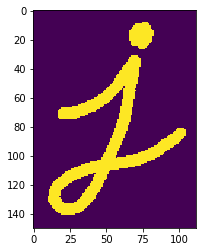

In [157]:
plt.imshow(img)

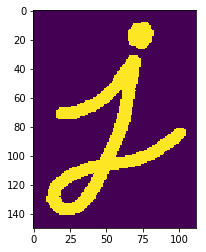

In [158]:
plt.imshow(dilation)

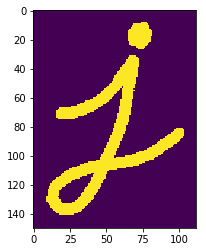

In [159]:
plt.imshow(erosion)

In [160]:
erosion[20]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999

In [161]:
img[20]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999

In [162]:
dilation[20]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999